Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 13. | 
**[WebScraping Project Part 1](./WebScrapingProjectPart1.ipynb)** | [WebScraping Project Part 2](./WebScrapingProjectPart2.ipynb)  | [WebScraping Project Part 3](./WebScrapingProjectPart3.ipynb) | [WebScraping Project Final Code](./WebScrapingProjectFinalCode.ipynb)

- - -

# Project 1: Building a Webscraper with Python  

### What is Web Scraping?

Web scraping is the process of gathering information from the Internet. Even copy-pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation. Some websites don’t like it when automatic scrapers gather their data, while others don’t mind.

If you’re scraping a page respectfully for educational purposes, then you’re unlikely to have any problems. Still, it’s a good idea to do some research on your own and make sure that you’re not violating any Terms of Service before you start a large-scale project. 

### Why Web Scrape?

Say you’re a surfer (both online and in real life) and you’re looking for employment. However, you’re not looking for just any job. With a surfer’s mindset, you’re waiting for the perfect opportunity to roll your way!

There’s a job site that you like that offers exactly the kinds of jobs you’re looking for. Unfortunately, a new position only pops up once in a blue moon. You think about checking up on it every day, but that doesn’t sound like the most fun and productive way to spend your time.

Thankfully, the world offers other ways to apply that surfer’s mindset! Instead of looking at the job site every day, you can use Python to help automate the repetitive parts of your job search. Automated web scraping can be a solution to speed up the data collection process. You write your code once and it will get the information you want many times and from many pages.

In contrast, when you try to get the information you want manually, you might spend a lot of time clicking, scrolling, and searching. This is especially true if you need large amounts of data from websites that are regularly updated with new content. Manual web scraping can take a lot of time and repetition.

There’s so much information on the Web, and new information is constantly added. Something among all that data is likely of interest to you, and much of it is just out there for the taking. Whether you’re actually on the job hunt, gathering data to support your grassroots organization, or are finally looking to get all the lyrics from your favorite artist downloaded to your computer, automated web scraping can help you accomplish your goals.

### Challenges of Webscraping

The Web has grown organically out of many sources. It combines a ton of different technologies, styles, and personalities, and it continues to grow to this day. In other words, the Web is kind of a hot mess! This can lead to a few challenges you’ll see when you try web scraping.

One challenge is variety. Every website is different. While you’ll encounter general structures that tend to repeat themselves, each website is unique and will need its own personal treatment if you want to extract the information that’s relevant to you.

Another challenge is durability. Websites constantly change. Say you’ve built a shiny new web scraper that automatically cherry-picks precisely what you want from your resource of interest. The first time you run your script, it works flawlessly. But when you run the same script only a short while later, you run into a discouraging and lengthy stack of tracebacks!

This is a realistic scenario, as many websites are in active development. Once the site’s structure has changed, your scraper might not be able to navigate the sitemap correctly or find the relevant information. The good news is that many changes to websites are small and incremental, so you’ll likely be able to update your scraper with only minimal adjustments.

However, keep in mind that because the internet is dynamic, the scrapers you’ll build will probably require constant maintenance. You can set up continuous integration to run scraping tests periodically to ensure that your main script doesn’t break without your knowledge.

### APIS: An alternative to web scraping 

Some website providers offer Application Programming Interfaces (APIs) that allow you to access their data in a predefined manner. With APIs, you can avoid parsing HTML and instead access the data directly using formats like JSON and XML. HTML is primarily a way to visually present content to users.

When you use an API, the process is generally more stable than gathering the data through web scraping. That’s because APIs are made to be consumed by programs, rather than by human eyes. If the design of a website changes, then it doesn’t mean that the structure of the API has changed.

However, APIs can change as well. Both the challenges of variety and durability apply to APIs just as they do to websites. Additionally, it’s much harder to inspect the structure of an API by yourself if the provided documentation is lacking in quality.

The approach and tools you need to gather information using APIs are outside the scope of this project. 

## Scraping the Monster Job Site 

In this project, you’ll build a web scraper that fetches Software Developer job listings from the Monster job aggregator site. Your web scraper will parse the HTML to pick out the relevant pieces of information and filter that content for specific words.

You can scrape any site on the Internet that you can look at, but the difficulty of doing so depends on the site. This tutorial offers you an introduction to web scraping to help you understand the overall process. Then, you can apply this same process for every website you’ll want to scrape.

## Step 1: Inspect your Data

### Explore the website

The first step is to head over to the site you want to scrape using your favorite browser. You’ll need to understand the site structure to extract the information you’re interested in.
Click through the site and interact with it just like any normal user would. For example, you could search for Software Developer jobs in Australia using the site’s native search interface.You can see that there’s a list of jobs returned on the left side, and there are more detailed descriptions about the selected job on the right side. When you click on any of the jobs on the left, the content on the right changes. You can also see that when you interact with the website, the URL in your browser’s address bar also changes.

#### Lets dive into that URL 

A lot of information can be encoded in a URL. Your web scraping journey will be much easier if you first become familiar with how URLs work and what they’re made of. Try to pick apart the URL of the site you’re currently on.

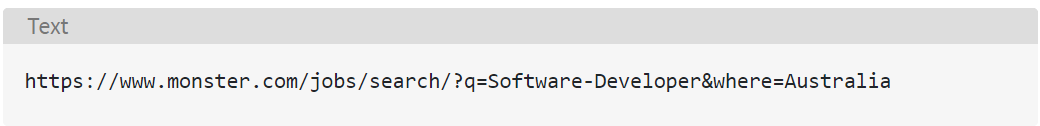

You can deconstruct the above URL into two main parts:

1. The **base URL** represents the path to the search functionality of the website. In the example above, the base URL is https://www.monster.com/jobs/search/.
2. The **query parameters** represent additional values that can be declared on the page. In the example above, the query parameters are ?q=Software-Developer&where=Australia.

Any job you’ll search for on this website will use the same base URL. However, the query parameters will change depending on what you’re looking for. You can think of them as query strings that get sent to the database to retrieve specific records.

Query parameters generally consist of three things:

1. **Start:** The beginning of the query parameters is denoted by a question mark (?).
2. **Information:** The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).
3. **Separator:** Every URL can have multiple query parameters, which are separated from each other by an ampersand (&).

Equipped with this information, you can pick apart the URL’s query parameters into two key-value pairs:

1. **q=Software-Developer** selects the type of job you’re looking for.
2. **where=Australia** selects the location you’re looking for.
Try to change the search parameters and observe how that affects your URL. Go ahead and enter new values in the search bar up top

Next, try to change the values directly in your URL.

You’ll notice that changes in the search box of the site are directly reflected in the URL’s query parameters and vice versa. If you change either of them, then you’ll see different results on the website. When you explore URLs, you can get information on how to retrieve data from the website’s server.

### Let's continue inspecting the site using developer tools

Next, you’ll want to learn more about how the data is structured for display. You’ll need to understand the page structure to pick what you want from the HTML response that you’ll collect in one of the upcoming steps.

**Developer tools** can help you understand the structure of a website. All modern browsers come with developer tools installed. In this tutorial, you’ll see how to work with the developer tools in Chrome. The process will be very similar to other modern browsers.

In Chrome, you can open up the developer tools through the menu *View → Developer → Developer Tools*. You can also access them by right-clicking on the page and selecting the Inspect option, or by using a keyboard shortcut.

Developer tools allow you to interactively explore the site’s DOM (Document Object Model) to better understand the source that you’re working with. To dig into your page’s DOM, select the Elements tab in developer tools. You’ll see a structure with clickable HTML elements. You can expand, collapse, and even edit elements right in your browser

You can think of the text displayed in your browser as the HTML structure of that page. 

When you right-click elements on the page, you can select Inspect to zoom to their location in the DOM. You can also hover over the HTML text on your right and see the corresponding elements light up on the page.

### TASK

Find a single job posting. What HTML element is it wrapped in, and what other HTML elements does it contain?

- - - 
<!--NAVIGATION-->
Module 13. | 
**[WebScraping Project Part 1](./WebScrapingProjectPart1.ipynb)** | [WebScraping Project Part 2](./WebScrapingProjectPart2.ipynb)  | [WebScraping Project Part 3](./WebScrapingProjectPart3.ipynb) | [WebScraping Project Final Code](./WebScrapingProjectFinalCode.ipynb)

- - -